In [22]:

import numpy as np
import matplotlib.pyplot as plt
from  Reson_Sim.Resonator import Resonator as rs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import keras

t =np.linspace(2,11,10)
c = np.linspace(0,100,50)
print(c)
corr_min = []
rs1 = rs(Temp=t,concentration=10)

[  0.           2.04081633   4.08163265   6.12244898   8.16326531
  10.20408163  12.24489796  14.28571429  16.32653061  18.36734694
  20.40816327  22.44897959  24.48979592  26.53061224  28.57142857
  30.6122449   32.65306122  34.69387755  36.73469388  38.7755102
  40.81632653  42.85714286  44.89795918  46.93877551  48.97959184
  51.02040816  53.06122449  55.10204082  57.14285714  59.18367347
  61.2244898   63.26530612  65.30612245  67.34693878  69.3877551
  71.42857143  73.46938776  75.51020408  77.55102041  79.59183673
  81.63265306  83.67346939  85.71428571  87.75510204  89.79591837
  91.83673469  93.87755102  95.91836735  97.95918367 100.        ]
co2 at abs depth of 10%
Gases: co2, 


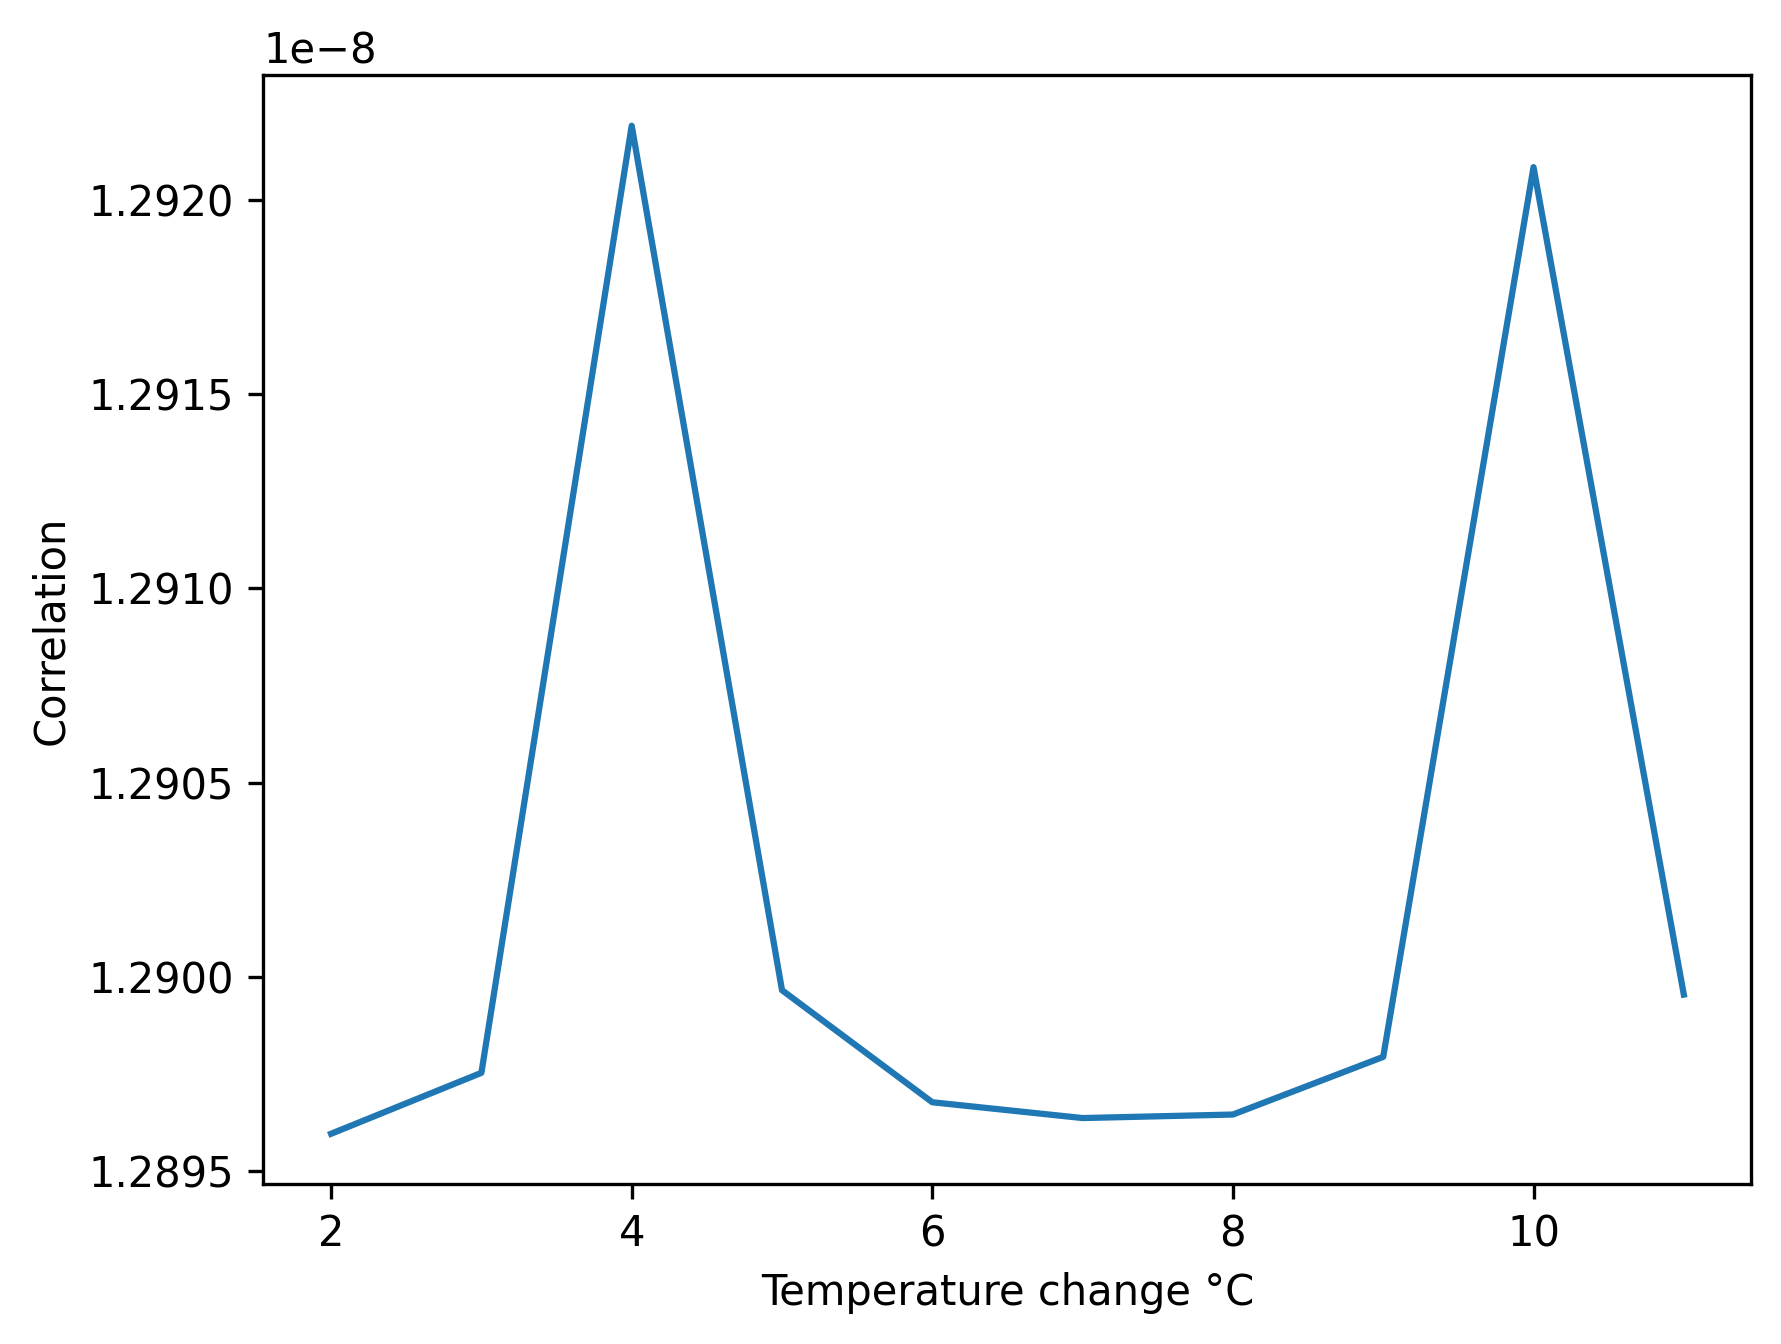

In [23]:
rs1.display_correlation()


In [24]:
for i in c:
    r = rs(Temp=t,concentration=i)
    corr_min.append(r.cmin())

corr_min = np.array(corr_min)    

Gases: 
co2 at abs depth of 2.0408163265306123%
Gases: co2, 
co2 at abs depth of 4.081632653061225%
Gases: co2, 
co2 at abs depth of 6.122448979591837%
Gases: co2, 
co2 at abs depth of 8.16326530612245%
Gases: co2, 
co2 at abs depth of 10.204081632653061%
Gases: co2, 
co2 at abs depth of 12.244897959183675%
Gases: co2, 
co2 at abs depth of 14.285714285714286%
Gases: co2, 
co2 at abs depth of 16.3265306122449%
Gases: co2, 
co2 at abs depth of 18.367346938775512%
Gases: co2, 
co2 at abs depth of 20.408163265306122%
Gases: co2, 
co2 at abs depth of 22.448979591836736%
Gases: co2, 
co2 at abs depth of 24.48979591836735%
Gases: co2, 
co2 at abs depth of 26.53061224489796%
Gases: co2, 
co2 at abs depth of 28.571428571428573%
Gases: co2, 
co2 at abs depth of 30.612244897959183%
Gases: co2, 
co2 at abs depth of 32.6530612244898%
Gases: co2, 
co2 at abs depth of 34.69387755102041%
Gases: co2, 
co2 at abs depth of 36.734693877551024%
Gases: co2, 
co2 at abs depth of 38.775510204081634%
Gases: co

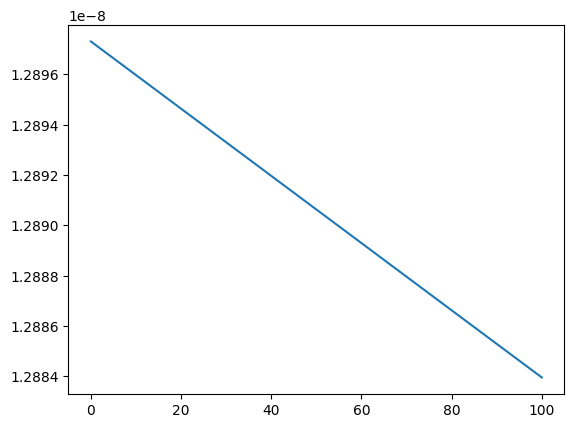

In [25]:
plt.plot(c,corr_min)

In [26]:
model = Sequential(
)

model.add(Dense(64, input_dim = 1, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

model.fit(corr_min, c, epochs=200, batch_size=128)


Epoch 1/200
1/1 [==============================] - 1s 984ms/step - loss: 3367.3469 - mse: 3367.3469 - mae: 50.0000
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 3366.4368 - mse: 3366.4368 - mae: 49.9913
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 3365.4177 - mse: 3365.4177 - mae: 49.9817
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 3364.3738 - mse: 3364.3738 - mae: 49.9715
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 3363.3225 - mse: 3363.3225 - mae: 49.9609
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 3362.0771 - mse: 3362.0771 - mae: 49.9490
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 3360.5291 - mse: 3360.5291 - mae: 49.9350
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 3359.1619 - mse: 3359.1619 - mae: 49.9219
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 3357.6187 - mse: 3357.6

In [27]:
from scipy.stats import linregress

m1 = linregress(corr_min,c)
f = lambda x: m1.intercept+x*m1.slope
m1.rvalue,m1.intercept,m1.slope

(-0.9999999999999998, 96591.79898246065, -7489303266621.627)

In [28]:
import random as rnd

rnd.seed()
c1 = rnd.randrange(0,10**4)/10**3
rs2 = rs(Temp=t,concentration=c1)
f(rs2.cmin())


co2 at abs depth of 4.641%
Gases: co2, 


4.64100000000326

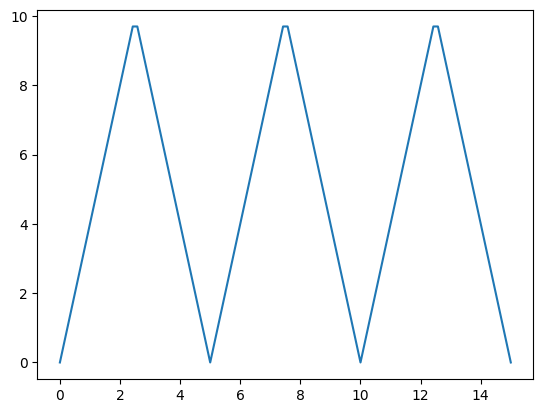

In [29]:
def _triangle(period,peak,now_time) -> float:
    
    now_frac = now_time//(period/2) #euclidian division 
    now_mod = now_frac%2 #which period are we on obtained by modulus
    #linear function going from 0 to peak in period/2
    if now_mod == 0: #if in first half of the triangle positive slope
        return 2*peak/period*(now_time-period/2*now_frac)
    else:
        return peak*(1-1/period*2*(now_time-period/2*now_frac))
    
f = lambda x: _triangle(5,10,x)    
x = np.linspace(0,15,100)
y = np.vectorize(f)(x)

plt.plot(x,y)


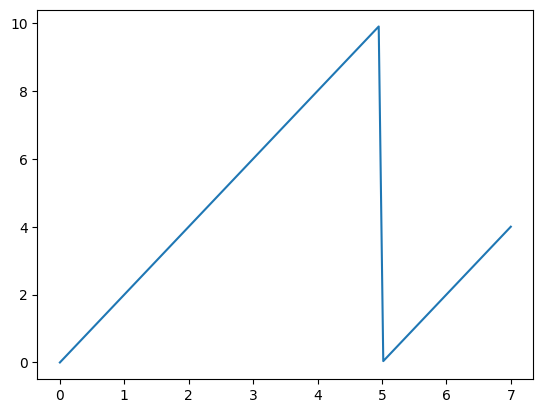

In [30]:
def _triangle(period,peak,now_time) -> float:
    
    now_frac = now_time//(period) #euclidian division 
    now_mod = now_frac%2 #which period are we on obtained by modulus
    #linear function going from 0 to peak in period/2
    #if now_mod == 0: #if in first half of the triangle positive slope
    #    return peak/period*(now_time-period*now_frac)
    #else:
    #    return peak*(1-1/period*2*(now_time-period/2*now_frac))
    return peak/period*(now_time-period*now_frac)
    
f = lambda x: _triangle(5,10,x)    
x = np.linspace(0,7,100)
y = np.vectorize(f)(x)

plt.plot(x,y)

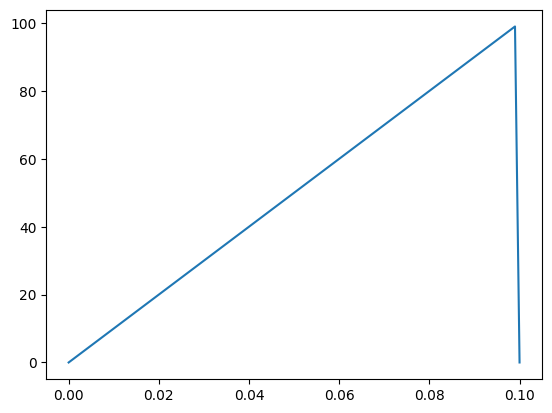

In [31]:
def _triangle(period,peak,now_time) -> float:
    
    now_frac = now_time//(period) #euclidian division 
    now_mod = now_frac%2 #which period are we on obtained by modulus
    #linear function going from 0 to peak in period/2
    if now_mod == 0: #if in first half of the triangle positive slope
        return peak/period*(now_time-period*now_frac)
    else:
        return peak*(1-1/period*2*(now_time-period/2*now_frac))
    
    
f = lambda x: _triangle(0.1,100,x)    
x = np.linspace(0,0.1,100)
y = np.vectorize(f)(x)

plt.plot(x,y)